In [1]:
import numpy as np
import xrfdc
import xrfclk
#from pynq import Xlnk
from pynq import Overlay
from pynq.lib import AxiGPIO
from pynq import allocate
import numpy as np
import socket
import time
import sys
from pynq import Clocks
from time import sleep
import multiprocessing, time
import logging, sys
from pynq import MMIO
import matplotlib.pyplot as plt
import threading
from IPython.display import display, update_display,  clear_output

import SQ_CARS
import importlib
from IPython.lib import backgroundjobs as bg
# Check if the cell has been executed before
if "has_run" not in globals():
    # Your code to run only once
    print("This code will run only once after kernel start.")

    # Set a flag to indicate that the code has been executed
    has_run = True

    thisConfig = SQ_CARS.mainConfig(SQ_CARS.config.config)
 # create utility object for holding various exp parameters
else:
    print('Bitstream will not be loaded now. To reload bitstream, please restart the kernel')

passed
This code will run only once after kernel start.


start num in u class [6000]
freq_list 6026.69100000021 [[6026.69100000021], [6026.69100000021], [6026.69100000021], [6026.69100000021], [6026.69100000021], [6026.69100000021], [6026.69100000021], [6026.69100000021]]


VBox()

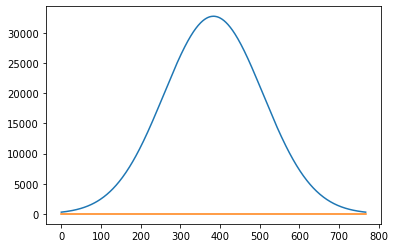

In [32]:
#Provide exp parameters
SQ_CARS.config.qubit_freq = [100] #MHz # When updating any of these parameters, update with list indexing, that will take effect in the whole framework
SQ_CARS.config.readout_freq = [6026.691] #MHz
SQ_CARS.config.cro_freq = [100] #MHz

SQ_CARS.config.exp_type = ['spectroscopy'] # power_rabi, #T1, #T2, #time_rabi
SQ_CARS.config.exp_steps = [50]
SQ_CARS.config.sample_file = '' #'numpy_array.txt' # sample_file

SQ_CARS.config.wave_type = 'gaussian'
SQ_CARS.config.wave_duration = 4000 #ns
SQ_CARS.config.sigma_gauss = 650 #ns


SQ_CARS.config.readout_rotation_angle = [0]
SQ_CARS.config.start_num = [6000]
SQ_CARS.config.end_num = [6010]



#non physics params

SQ_CARS.config.readout_channel_list = [1,0,0,0,0,1,1,1]
SQ_CARS.config.freq_list = [SQ_CARS.config.readout_freq ,    SQ_CARS.config.readout_freq ,
                            SQ_CARS.config.readout_freq ,      SQ_CARS.config.readout_freq ,
                            SQ_CARS.config.readout_freq ,    SQ_CARS.config.readout_freq,
                            SQ_CARS.config.readout_freq ,  SQ_CARS.config.readout_freq]

SQ_CARS.config.control_amplitude_list = [50,50,50,50]
SQ_CARS.config.readout_amplitude_list = [100,100,100,100]
SQ_CARS.config.phase_list = [0,0,0,0,0,0,0,0]
SQ_CARS.config.loopback = [1,1,1,1]
SQ_CARS.config.num_of_averages = [100000]
SQ_CARS.config.continuous = 0


try:
    
    del(u_obj)
    del(thread)
    del(rfdc_handle)

    logging.info('Executed normal')
    #jobs = bg.BackgroundJobManager()
except:
        
    logging.info('Executed except')
    
    
u_obj = SQ_CARS.utility_functions(SQ_CARS.config.hw_config, thisConfig)

rfdc_handle = SQ_CARS.rfdcConfig(u_obj)
rfdc_handle.stop_task = False
jobs = bg.BackgroundJobManager()
#thread = threading.Thread(target=rfdc_handle.run_exp)
#stop_event = threading.Event()

# Create a new thread for the task and pass the stop event
#thread = threading.Thread(target=rfdc_handle.run_exp, args=(stop_event,))

#multiprocessing.Process(target=task_instance.run, args=(stop_task,))
rfdc_handle.create_slider_widget()

In [ ]:
rfdc_handle.u_obj._start_freq

In [ ]:
coff_list = [0,0,0,0,0,0,0,0]

In [ ]:
coffs1 =rfdc_handle.readout[0]._adc_handle.GetCalCoefficients(1)
coffs2 =rfdc_handle.readout[0]._adc_handle.GetCalCoefficients(2)
coffs3 =rfdc_handle.readout[0]._adc_handle.GetCalCoefficients(3)
print_calib_coff(coffs1)
print_calib_coff(coffs1)
print_calib_coff(coffs1)

In [ ]:
rfdc_handle.readout[0]._adc_handle.SetCalCoefficients(1, coff_list)

In [ ]:
def print_calib_coff(cal_coefficients):
    coeff0 = cal_coefficients.Coeff0
    coeff1 = cal_coefficients.Coeff1
    coeff2 = cal_coefficients.Coeff2
    coeff3 = cal_coefficients.Coeff3                           
    coeff4 = cal_coefficients.Coeff4
    coeff5 = cal_coefficients.Coeff5
    coeff6 = cal_coefficients.Coeff6
    coeff7 = cal_coefficients.Coeff7

    # Print the calibration coefficients
    print(f"Coeff0: {coeff0}")
    print(f"Coeff1: {coeff1}")
    print(f"Coeff2: {coeff2}")
    print(f"Coeff3: {coeff3}")
    print(f"Coeff4: {coeff4}")
    print(f"Coeff5: {coeff5}")
    print(f"Coeff6: {coeff6}")
    print(f"Coeff7: {coeff7}")

In [4]:
a =rfdc_handle.readout[0]._adc_handle.GetCalFreez(0)
print(a)

1


In [34]:
a =rfdc_handle.readout[0]._adc_handle.SetCalFreez(0)
print(a)

0


In [26]:
#rfdc_handle.dac[7]._dac_handle.MixerSettings['Freq'] = 5000
rfdc_handle.dac[7].set_nyquist_zone(2)
rfdc_handle.readout[0].set_nyquist_zone(2)

In [38]:
#asasda#rfdc_handle.run_exp()
rfdc_handle._stop_task = False
jj=jobs.new(rfdc_handle.run_exp)

#display(rfdc_handle.progress_bar)
#jj.start()

In [ ]:
rfdc_handle.run_exp()

In [ ]:
for i in range(1):
    print(rfdc_handle.readout[i]._adc_handle.NyquistZone)

In [ ]:
start = [0, 100, 0, 100]
end = [100, 0, 100, 0]
for i in range(4):
    SQ_CARS.config.start_num[0] = start[i]
    SQ_CARS.config.end_num[0] = end[i]
    rfdc_handle.u_obj.cal_exp_params()
    
    print('start power', rfdc_handle.u_obj._start_power)
    rfdc_handle._stop_task = False
    jj=jobs.new(rfdc_handle.run_exp)
    while(jj.is_alive()==True):
        sleep(0)
    
    #jj.join()
    

In [ ]:
jj.is_alive()

In [39]:

rfdc_handle.stop_task_execution()
print('task stopped')
jj.join()

task stopped


In [ ]:
rfdc_handle.rf.get_adc_calibration_coefficients

In [ ]:
rfdc_handle.o1.ip_dict

In [ ]:
rfdc_handle.readout[0]._adc_handle.CalFreeze['FreezeCalibration']=1

In [ ]:
rfdc_handle.u_obj._end_trigger_delay/99

In [ ]:
print(a)

In [ ]:
int((rfdc_handle.u_obj._start_power - rfdc_handle.u_obj._start_trigger_delay ) / (rfdc_handle.u_obj._exp_steps-1))

In [ ]:
#def create_slider_widget(self):
# Define the callback functions for each slider
import ipywidgets as widgets
self = rfdc_handle
self._slider_ch_num = 0
def slider1_callback(value):
    with slider1_output:
        clear_output(wait=True)
        new_value = value['new']
        print(f"Amplitude: {new_value} for channel {self._slider_ch_num}")
        self.dac[self._slider_ch_num].set_param('amplitude_factor_direct', new_value, 'scale')

def slider2_callback(value):
    with slider2_output:
        clear_output(wait=True)
        new_value = value['new']
        print(f"Phase: {new_value}")
        self.dac[self._slider_ch_num].set_nco_phase(new_value)
        self.run_MTS()

def slider3_callback(value):
    with slider3_output:
        clear_output(wait=True)
        new_value = value['new']
        quad = int(new_value/90)
        theta = new_value//4
        print(f"Rotation: {new_value}")
        self.readout[0].set_adc_quad(quad)
        self.readout[0].set_adc_theta(theta)

def slider4_callback(value):
    with slider4_output:
        clear_output(wait=True)
        new_value = value['new']
        print(f"Readout Amplitude: {new_value}")
        self.dac[self._slider_ch_num].set_param('amplitude_factor_direct', new_value, 'scale')
        self.dac[self._slider_ch_num].set_param('trigger_scaled_value', new_value, 'scale')

#         # Define the callback function for the button
#         def button_callback(button):
#             input_number = int(number_input.value)
#             if 0 <= input_number <= 7:  # Define the desired number limit
#                 with number_output:
#                     clear_output(wait=True)
#                     self._slider_ch_num = input_number
#                     print("Channel number: ", input_number)
#             else:
#                 with number_output:
#                     clear_output(wait=True)
#                     print("Invalid input. Please enter a number between 0 and 7")
def number_dropdown_callback(button):
    input_number = int(number_dropdown.value)
    if 0 <= input_number <= 7:  # Define the desired number limit
        with number_output:
            clear_output(wait=True)
            self._slider_ch_num = input_number
            print("Channel Number:", input_number)
    else:
        with number_output:
            clear_output(wait=True)
            print("Invalid input. Please select a number between 0 and 7")

# Define the callback function for the string button
def string_dropdown_callback(button):
    input_string = str(string_dropdown.value)
    with string_output:
        clear_output(wait=True)
        print("Experiment Type: (Mode/Exp Type Changes for all channels)", input_string)
        self.u_obj._exp_type[0] = input_string
        self.u_obj.cal_exp_params()
        self.update_mode()
def number1_dropdown_callback(button):
    input_number = int(number1_dropdown.value)
    with number1_output:
        clear_output(wait=True)
        self.dac[self._slider_ch_num].set_readout_channel(input_number)
        ss = 'Readout Ch' if (input_number ==1) else 'Control Ch'
        print("Channel Number:", self._slider_ch_num, " is" , ss, "now")
def loopback_dropdown_callback(button):
    input_number = int(number1_dropdown.value)
    with loopback_output:
        clear_output(wait=True)
        #self.dac[self._slider_ch_num].set_readout_channel(input_number)
        if(self._slider_ch_num>3):
            ss = f'Given channel no is {self._slider_ch_num} but this will update channel no {self._slider_ch_num%4} '
            
           
        else:
            ss = 'in loopback' if (input_number ==1) else 'not in loopback'
        print("Loopback Channel Number:", self._slider_ch_num,  ss)
        
        self.u_obj._loopback[self._slider_ch_num%4] = input_number
        self.update_loopback()
def input_number1_callback(value):
        with input_number1_output:
            clear_output(wait=True)
            new_value = value['new']
            config.start_num[0] = new_value
            self.u_obj.cal_exp_params()
            print(f"Start number for exp is: {new_value}")
            # Perform desired actions with new_value

def input_number2_callback(value):
    with input_number2_output:
        clear_output(wait=True)
        new_value = value['new']
        config.end_num[0] = new_value
        self.u_obj.cal_exp_params()
        print(f"End number for exp is: {new_value}")
            # Perform desired actions with new_value
def input_exp_steps_callback(value):
    with input_exp_steps_output:
        clear_output(wait=True)
        new_value = value['new']
        config.exp_steps = new_value
        self.u_obj.cal_exp_params()
        print(f"Experment Steps are : {new_value}")

# Create the slider descriptions with long names
slider1_label = widgets.Label(value='Control Ch Amplitude Scale:')
slider2_label = widgets.Label(value='Control Ch Phase Scale2 (in Degrees):')
slider3_label = widgets.Label(value='Readout Rotation angle (in Degrees):')
slider4_label = widgets.Label(value='Readout Ch Amplitude Scale:')

# Create the sliders
slider1 = widgets.FloatSlider(min=0, max=100, step=0.1, value = self.dac[self._slider_ch_num].get_param('amplitude_factor_direct') )
slider2 = widgets.FloatSlider(min=0, max=179, step=1, value = self.dac[self._slider_ch_num]._nco_phase)
slider3 = widgets.FloatSlider(min=0, max=360, step=1, value = self.readout[0].get_adc_theta() )
slider4 = widgets.FloatSlider(min=0, max=100, step=0.1, value = self.dac[self._slider_ch_num].get_param('trigger_scaled_value'))


# Register the callbacks to the slider events
slider1.observe(slider1_callback, 'value')
slider2.observe(slider2_callback, 'value')
slider3.observe(slider3_callback, 'value')
slider4.observe(slider4_callback, 'value')

# Create the number input field and button
#         number_input = widgets.IntText(description='Number:', min=0, max=100)  # Set the desired number limits
#         button = widgets.Button(description='Submit')
#         button.on_click(button_callback)

# Create the number dropdown menu
number_values = list(range(8))  # Define the range of numbers
number_dropdown = widgets.Dropdown(options=number_values, description='Channel Number:')
number_dropdown.observe(number_dropdown_callback, 'value')
# Create the string dropdown menu
string_values = ['power_rabi', 'time_rabi', 'T1', 'T2', 'cw', 'power_rabi_2pulses']  # Define the predefined string values
string_dropdown = widgets.Dropdown(options=string_values, description='Exp Type:', value = self.u_obj._exp_type[0])
string_dropdown.observe(string_dropdown_callback, 'value')
 # Create the string dropdown menu for readout channel
number1_values = list(range(2))  # Define the range of numbers
number1_dropdown = widgets.Dropdown(options=number1_values, description='Is Readout ?', value = self.u_obj._readout_channel_list[self._slider_ch_num])
number1_dropdown.observe(number1_dropdown_callback, 'value')
#Create loopback dropdown
loopback_values = list(range(2))  # Define the range of numbers
loopback_dropdown = widgets.Dropdown(options=loopback_values, description='Is Loopback ?', value = self.u_obj._readout_channel_list[self._slider_ch_num])
loopback_dropdown.observe(loopback_dropdown_callback, 'value')

input_number1 = widgets.IntText(description='start_num:', value = SQ_CARS.config.start_num[0])
input_number2 = widgets.IntText(description='end_num:', value = SQ_CARS.config.end_num[0])
input_exp_steps = widgets.IntText(description='exp_steps:', value = SQ_CARS.config.exp_steps)

input_number1.observe(input_number1_callback, 'value')
input_number2.observe(input_number2_callback, 'value')
input_exp_steps.observe(input_exp_steps_callback, 'value')
# Create output widgets
slider1_output = widgets.Output()
slider2_output = widgets.Output()
slider3_output = widgets.Output()
slider4_output = widgets.Output()
number_output = widgets.Output()
string_output = widgets.Output()
number1_output = widgets.Output()
loopback_output  = widgets.Output()
input_number1_output=widgets.Output()
input_number2_output=widgets.Output()
input_exp_steps_output=widgets.Output()


# Create layout containers
slider_box = widgets.VBox([slider1_label, slider1, slider2_label, slider2, slider3_label, slider3, slider4_label, slider4])
output_box = widgets.VBox()
input_box = widgets.VBox([ number_dropdown, loopback_dropdown, string_dropdown, number1_dropdown, input_number1, input_number2, input_exp_steps])
#output_area = widgets.VBox()
output_area = widgets.VBox([slider1_output, slider2_output, slider3_output, slider4_output])




# Display the layout containers and output widgets
display(widgets.HBox([input_box, widgets.VBox([number_output, string_output, number1_output, loopback_output, input_number1_output, input_number2_output])]), output_box, slider_box, output_area)